### SECTION: 1 

**STATEMENT : CREDIT CARD FRAUDLENT TRANSACTION PREDICTION**

* Digital payments are evolving, but so are cyber criminals.
* According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.
* In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

* Hence our challenge is to detect the fraud transaction based on some pre-collected data 

![alt text](https://storage.googleapis.com/kaggle-datasets-images/2156255/3594108/164614c29bcf61908ddac0103bae1615/dataset-cover.jpg?t=2022-05-07-15-17-31)

[ Image Sorce] (https://storage.googleapis.com/kaggle-datasets-images/2156255/3594108/164614c29bcf61908ddac0103bae1615/dataset-cover.jpg?t=2022-05-07-15-17-31)

#### Libraries

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc = {"figure.figsize":(10, 6)})
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import adam_v2
from tensorflow.keras import callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, RMSprop
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### SECTION: 2

**THE DATASET IS TAKEN FROM:**(https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)

## About the data

Features Explanation:
* distance_from_home, numeric - the distance from home where the transaction happened.
* distance_from_last_transaction, numeric - the distance from last transaction happened.
* ratio_to_median_purchase_price, numeric - Ratio of purchased price transaction to median purchase price.
* repeat_retailer, binary - Is the transaction happened from same retailer.
* used_chip, binary - Is the transaction through chip (credit card). (0 - chip not used , 1 - chip used)
* used_pin_number, binary - Is the transaction happened by using PIN number. (0 -pin number not used , 1 - pin number used)
* online_order, binary - Is the transaction an online order. ( 0 - online order not occured , 1 - online order ocuured)
* fraud, binary - Is the transaction fraudulent. (0 - fraud happend, 1 - fraud not happend)

In [35]:
df = pd.read_csv("card_transdata.csv"); df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [36]:
df.shape

(1000000, 8)

In [37]:
#df.describe()

In [38]:
#df.info()

In [39]:
def plot_history(history,xlab = "",ylab1 = "", ylab2 = "", title1 = "",title2 = ""):
    fig = plt.figure(figsize = (13,6))
    ax = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax.plot(history.history['loss'], label='loss train')
    ax.plot(history.history['val_loss'], label='loss val')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab1)
    ax.set_title(title1)
    ax.legend(loc='best')
    
    ax2.plot(history.history['binary_accuracy'], label='acc train')
    ax2.plot(history.history['val_binary_accuracy'], label='acc val')
    ax2.set_xlabel(xlab)
    ax2.set_ylabel(ylab2)
    ax2.set_title(title2)
    ax2.legend(loc = 'best')
    return
    

### SECTION: 3

##### Data Preprocessing

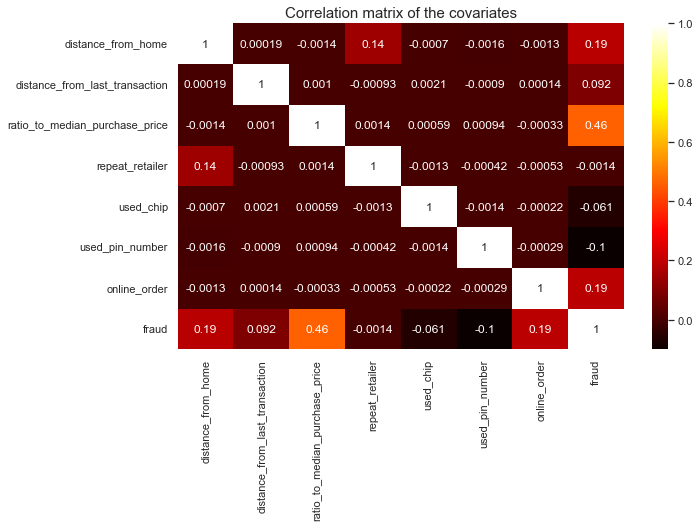

In [40]:
df_corr = df.corr()
sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns, annot = True, cmap = "hot")
plt.title("Correlation matrix of the covariates", fontsize = 15)
plt.show()

* From the above correlation matrix we can come up that all the covariates are independent to each other so we will consider all the covariates in our model

Normal transaction       912597
Fraudlent transaction     87403
dtype: int64

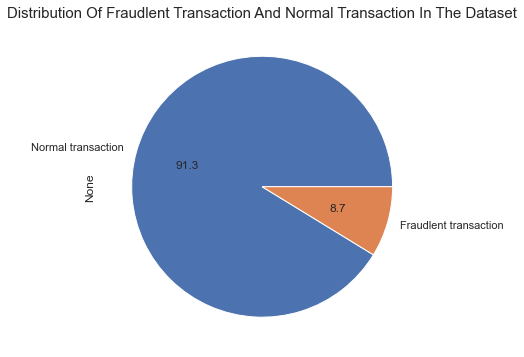

In [41]:
df1 = df.value_counts('fraud')
index_ = ["Normal transaction","Fraudlent transaction"]
df1.index = index_
df1.plot.pie(autopct = "%.1f")
plt.title('Distribution Of Fraudlent Transaction And Normal Transaction In The Dataset', fontsize = 15)
df1

Now the most of the data (91.3 %) comes from Normal Transaction and rest (8.7 %) comes from fraudlent transaction so we need to
balance the both set of data classes so that we can come up with a better robust classifier
* For that we need to Down-sample the data
* Here we have taken the dataset randomly in such a way that 60% percent of the data comes from Normal Transaction and rest from Fraudlent transaction

##### Down-Sampling of Data

In [42]:
genuine = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]
genuine_resample = genuine.sample(n =np.int(np.round((len(fraud))*(3/2))),random_state= 42)

In [43]:
data = pd.concat([genuine_resample, fraud],axis = 0)

In [44]:
data = shuffle(data); data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
58394,50.003012,0.230852,0.327466,1.0,0.0,0.0,0.0,0.0
669250,11.518301,0.078069,1.411870,1.0,0.0,1.0,1.0,0.0
613155,38.942352,5.495711,7.847738,1.0,1.0,0.0,1.0,1.0
505582,13.586474,1.581135,0.876283,1.0,1.0,0.0,0.0,0.0
747230,44.286877,1.509443,5.180390,1.0,0.0,0.0,1.0,1.0


In [45]:
print("Total data after downsampling - ",data.shape[0])

Total data after downsampling -  218507


Normal transaction       131104
Fraudlent transaction     87403
dtype: int64

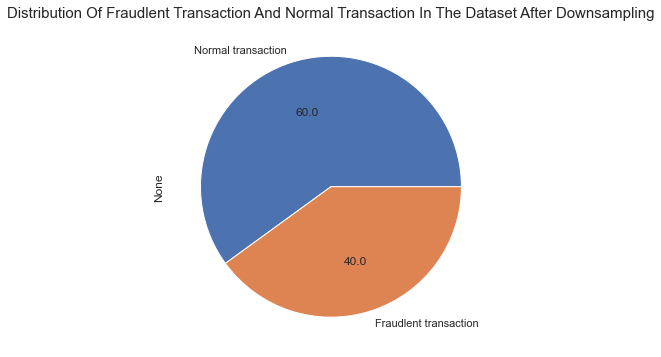

In [46]:
data1 = data.value_counts('fraud')
index_ = ["Normal transaction","Fraudlent transaction"]
data1.index = index_
data1.plot.pie(autopct = "%.1f")
plt.title('Distribution Of Fraudlent Transaction And Normal Transaction In The Dataset After Downsampling', fontsize = 15)
data1

##### VIF

In [47]:
label = data["fraud"]
feature = data.drop(["fraud"], axis = 1)

In [48]:
X = add_constant(feature)
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(feature.shape[1])], index= X.columns[0:-1])

In [49]:
vif

const                             12.055622
distance_from_home                 1.034637
distance_from_last_transaction     1.002721
ratio_to_median_purchase_price     1.029459
repeat_retailer                    1.025075
used_chip                          1.008829
used_pin_number                    1.010445
dtype: float64

### SECTION: 4

##### Train Test Split

In [50]:
feature.shape

(218507, 7)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, label, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_train,Y_train, test_size=0.2, random_state=42)

In [52]:
x_train1 = np.array(x_train).reshape(len(y_train),7,1)
x_val1 = np.array(x_val).reshape(len(y_val),7,1)
X_test1 = np.array(X_test).reshape(len(Y_test),7,1)

In [77]:
print('\033[1m'+"Training shape : ", x_train.shape)
print('\033[1m'+"Size of validation data : ", len(y_val))
print('\033[1m'+"Size of test data : ", len(Y_test))

Training shape :  (139844, 7)
Size of validation data :  34961
Size of test data :  43702


* Now the basic model that is use to classify a binary class is a Linear Model ( Logistic Regression)

#### **LINEAR MODEL : LOGISTIC REGRESSION**

In [54]:
x_train2 = normalize(x_train)
x_test2 = normalize(X_test)
x_val2 = normalize(x_val)

In [56]:
clf_reg_lbfgs = LogisticRegression(solver = "newton-cg")
clf_reg_lbfgs.fit(x_train2, y_train) 

LogisticRegression(solver='newton-cg')

In [76]:
print('\033[1m'+"Train Score using lbfgs : ", sum(clf_reg_lbfgs.predict(x_train2) == y_train)*100/len(X_train), "percentage")
print('\033[1m'+"Test Score using lbfgs  : ", sum(clf_reg_lbfgs.predict(x_test2) == Y_test)*100/len(X_test), "percentage")

Train Score using lbfgs :  63.808243471296585 percentage
Test Score using lbfgs  :  79.87506292618187 percentage


In [58]:
y_score1 = clf_reg_lbfgs.predict_proba(x_test2)[:,1]

In [59]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)

In [74]:
print('\033[1m'+'roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, y_score1))

roc_auc_score for Logistic Regression:  0.9107753399084867


##### Hence Linear Model like logistic regression gives us accuracy of 79.88 percent in test data

* So now we will try with non linear model for better testing accuracy

#### **NON LINEAR MODEL : DECISION TREE**

In [61]:
clf_tree = DecisionTreeClassifier(random_state=40, criterion="entropy")

In [72]:
clf_tree.fit(x_train, y_train)

y_predicted = clf_tree.predict(X_test.astype(int))
y_train_pred = clf_tree.predict(x_train)

print('\033[1m'+" Test accuracy of Decision tree is : ", accuracy_score(Y_test, y_predicted))
print('\033[1m'+" Train accuracy of Decision tree is : ", accuracy_score(y_train, y_train_pred))


 Test accuracy of Decision tree is :  0.9127728708068281
 Train accuracy of Decision tree is :  1.0


In [63]:
y_score2 = clf_tree.predict_proba(X_test.astype(int))[:,1]

In [64]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score2)

In [73]:
print('\033[1m'+'roc_auc_score for DecisionTree: ', roc_auc_score(Y_test, y_score2))

roc_auc_score for DecisionTree:  0.8904883716546663


##### The non linear model Decision Tree gives 91.28 percent accuracy in test data
* So the non linear model decision tree gives better performance than linear model in terms of accuracy
* But decision tree is very much biased on the train Data
* So now we will build a random forest classifier model which is less biased on the training data

[To know why Random forests classifier outperforms Decision Trees Classifier] (https://towardsdatascience.com/why-random-forests-outperform-decision-trees-1b0f175a0b5#:~:text=Here%20we%E2%80%99ll%20provide%20two%20reasons%20why%20random%20forests,into%20more%20and%20smaller%20regions.%20Trees%20are%20diverse.)

#### **Random Forest Classifier**

In [66]:
clf_rf = RandomForestClassifier(random_state = 10)
clf_rf.fit(x_train, y_train)
y_pred = clf_rf.predict(X_test.astype(int))
y_train_pred = clf_rf.predict(x_train.astype(int))

In [71]:
print('\033[1m'+"Accuracy of Random Forest is : ", accuracy_score(Y_test, y_pred))
print('\033[1m'+"Accuracy of Random Forest is : ", accuracy_score(y_train, y_train_pred))

Accuracy of Random Forest is :  0.9777355727426662
Accuracy of Random Forest is :  0.9773747890506564


In [79]:
y_score3 = clf_rf.predict_proba(X_test.astype(int))[:,1]

In [80]:
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, y_score3)

In [81]:
print('\033[1m'+'roc_auc_score for Random Forest: ', roc_auc_score(Y_test, y_score3))

roc_auc_score for Random Forest:  0.9999930814332221


##### The non linear model Random Forest gives 97.78 percent accuracy in test data

### ROC Curve
* A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

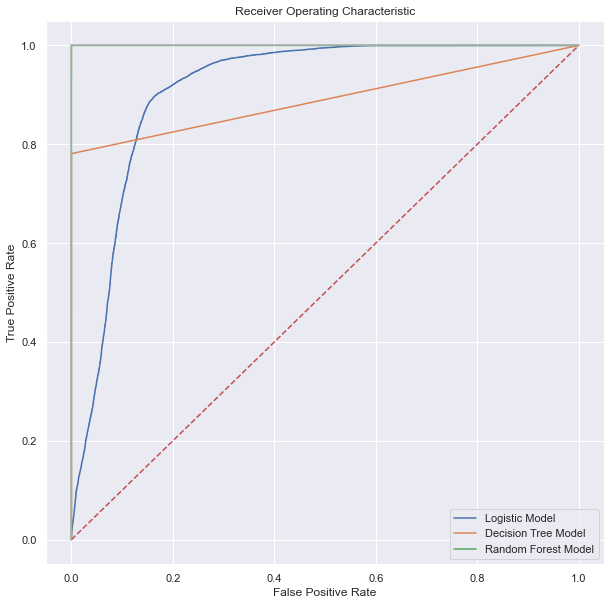

In [82]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1, label = "Logistic Model")
plt.plot(false_positive_rate2, true_positive_rate2, label = "Decision Tree Model")
plt.plot(false_positive_rate3, true_positive_rate3, label = "Random Forest Model")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.legend(loc = "best")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

True positivity rate of Random Forest is highest among logistic regression

##### So to classify fraud and non fraud transaction we have used 
* Logistic regression (linear model) with test accuracy - 79 percent 
* Decision tree (non linear model) with test accuracy - 89 percent
* Random Forest (non linear model) with test accuracy - 97.78 percent

#### Now our dataset may have very large set of instances so we dive into large scale Deep Learning techniques to classify fraudlent and non farudlent transaction

### SECTION: 5

### Deep Learning Model Building

We have build a deep learning model with 2 hidden layer using activation function as relu and one fully connected layer with sigmoid activation function

In [83]:
def model1():
    model = Sequential()

    model.add(Dense(4, activation = "relu", input_shape=[7]))
    #model.add(BatchNormalization())
    model.add(Dense(8, activation = "relu"))
    #model.add(BatchNormalization())
    model.add(Dense(1, activation = "sigmoid"))
    return model

#### Now we will use various deep learning optimizer such as Adam, mini-batching, vanila SGD, RMSProp, Adagrad to compare their accuracy on test data 

Note : 
* To reduce the effect of Overfitting we have introduced an early-stopping criteria based on the validation loss with patience = 15

* we are initially starting the leraning as 0.01 and then changing the learning rate using ReduceLROnPlateau function      which reduce learning rate when a metric has stopped improving.

### Adam optimizer

**Algorithm Adam**

*Input:* global learning rate factor $\alpha$, decay rates $\rho_1$ and $\rho_2$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$
* Initialize timestep $t \leftarrow 0$

* **loop**
  * update timestep $t \leftarrow t + 1$
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate first moment estimate $s_j \leftarrow \rho_1 s_j + (1 - \rho_1) g_j$ for all $j \in \{1, \ldots, d \}$
  * accumulate second moment estimate $r_j \leftarrow \rho_2 r_j + (1 - \rho_2) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * correct first moment bias $\hat s \leftarrow \frac{s}{1 - \rho_1^t}$ 
  * correct second moment bias $\hat r \leftarrow \frac{r}{1 - \rho_2^t}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{\hat r_j}} \cdot \hat s_j$ for all $j \in \{1, \ldots, d \}$

**Adam** is Modified RMSProp to  use momentum with exponential weighting, and correct for bias to
estimate the first-order and second-order moments of the gradients

In [84]:
model = model1()
optimizer = adam_v2.Adam(learning_rate= 0.01, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [85]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15,verbose=1),
             ModelCheckpoint(filepath='best_model_loss.h5', monitor='val_loss', save_best_only=True,verbose=0),
             ReduceLROnPlateau(monitor="val_loss",factor=0.1, patience=25,verbose=1,mode="min",min_lr=0.000000001,cooldown=1)
            ]

In [86]:
epochs = 200

model.summary()
history = model.fit(x_train1, y_train, epochs=200,validation_data=(x_val1, y_val), verbose=1,callbacks=callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4371/4371 [==============================] - 11s 2ms/step - loss: 0.1939 - binary_accuracy: 0.9291 - val_loss: 0.1635 - val_binary_accuracy: 0.9394 - lr: 0.0100
Epoch 2/200
4371/4371 [==============================] - 8s 2ms/step - loss: 0.1689 - binary_accuracy: 0.9383 - val_loss: 0.1672 - val_binary_accuracy:

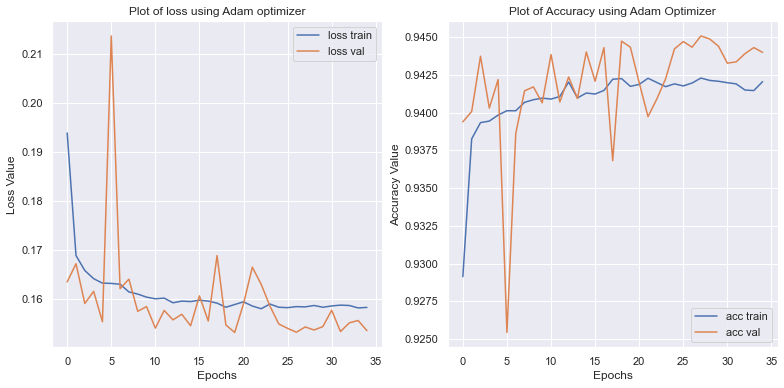

In [87]:
plot_history(history, xlab = "Epochs", ylab1 = "Loss Value", ylab2 = "Accuracy Value",
             title1 = "Plot of loss using Adam optimizer",
             title2 = "Plot of Accuracy using Adam Optimizer")

In [88]:
adam_train_loss = history.history['loss']
adam_val_loss = history.history['val_loss']
adam_train_accuracy = history.history['binary_accuracy']
adam_val_accuracy = history.history['val_binary_accuracy']

In [89]:
model.load_weights('best_model_loss.h5')
# evaluate the model for val_loss
train_accuracy = model.evaluate(x_train1, y_train, verbose=0)
val_accuracy = model.evaluate(x_val1,y_val, verbose=0)
test_accuracy = model.evaluate(X_test1,Y_test, verbose = 0)
adam_train_acc = train_accuracy[1]
adam_test_acc = test_accuracy[1]
print('\033[1m'+"Adam optimizer result")
print("*"*75)
print('\033[1m'+"train_loss: ", train_accuracy[0])
print('\033[1m'+"val_loss: ", val_accuracy[0])
print('\033[1m'+"test_loss", test_accuracy[0])
print()
print("*"*75)
print('\033[1m'+"train_accuracy: ", train_accuracy[1])
print('\033[1m'+"val_accuracy: ", val_accuracy[1])
print('\033[1m'+"test_accuracy", test_accuracy[1])
print()
print("*"*75)

Adam optimizer result
***************************************************************************
train_loss:  0.1543450653553009
val_loss:  0.1531728059053421
test_loss 0.1573479324579239

***************************************************************************
train_accuracy:  0.9436085820198059
val_accuracy:  0.9443379640579224
test_accuracy 0.9428859353065491

***************************************************************************


### Mini Batching

### Minibatching

One way to make SGD require fewer iterations is by decreasing the value of the gradient variance bound $\sigma^2$. A powerful way to do this is by using *minibatching*.

With minibatching, we use a sample of gradients of size larger than $1$. I.e.:

$$w_{t+1} = w_t - \alpha \cdot \frac{1}{B} \sum_{b=1}^B \nabla f_{i_{t,b}}(w_t) = w_t - \alpha \cdot \frac{1}{B} \sum_{b=1}^B \nabla_w \ell(w_t; x_{i_{t,b}}, y_{i_{t,b}}).$$

where $B$ is the *minibatch size* or *batch size*, and the $i_{t,b}$ are $b$ random variables drawn independently and uniformly from $\{1,\ldots,n\}$ (where $n$ is the size of the training set).

In [90]:
model = model1()
optimizer = SGD(learning_rate = 0.01)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [91]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15,verbose=1),
             ModelCheckpoint(filepath='best_model_loss.h5', monitor='val_loss', save_best_only=True,verbose=0),
             ReduceLROnPlateau(monitor="val_loss",factor=0.1, patience=25,verbose=1,mode="min",min_lr=0.000000001,cooldown=1)
            ]

In [92]:
epochs = 200
batch_size = 256

model.summary()
history = model.fit(x_train1, y_train, epochs=epochs,batch_size = batch_size,
                    validation_data=(x_val1, y_val), steps_per_epoch=x_train1.shape[0] // batch_size,
                    verbose=1,callbacks=callbacks)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 32        
                                                                 
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
546/546 [==============================] - 1s 2ms/step - loss: 0.5654 - binary_accuracy: 0.8050 - val_loss: 0.4658 - val_binary_accuracy: 0.9044 - lr: 0.0100
Epoch 2/200
546/546 [==============================] - 1s 2ms/step - loss: 0.4171 - binary_accuracy: 0.8983 - val_loss: 0.3787 - val_binary_accuracy: 0.

Epoch 92/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1502 - binary_accuracy: 0.9421 - val_loss: 0.1454 - val_binary_accuracy: 0.9438 - lr: 0.0100
Epoch 93/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1542 - binary_accuracy: 0.9407 - val_loss: 0.1454 - val_binary_accuracy: 0.9446 - lr: 0.0100
Epoch 94/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1498 - binary_accuracy: 0.9422 - val_loss: 0.1423 - val_binary_accuracy: 0.9444 - lr: 0.0100
Epoch 95/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1496 - binary_accuracy: 0.9420 - val_loss: 0.1411 - val_binary_accuracy: 0.9466 - lr: 0.0100
Epoch 96/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1496 - binary_accuracy: 0.9427 - val_loss: 0.1454 - val_binary_accuracy: 0.9431 - lr: 0.0100
Epoch 97/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1502 - binary_accuracy: 0.9421 - val_loss: 0.1457 - val_binary_accu

Epoch 140/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1233 - binary_accuracy: 0.9549 - val_loss: 0.1087 - val_binary_accuracy: 0.9611 - lr: 0.0100
Epoch 141/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1238 - binary_accuracy: 0.9545 - val_loss: 0.1072 - val_binary_accuracy: 0.9618 - lr: 0.0100
Epoch 142/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1265 - binary_accuracy: 0.9528 - val_loss: 0.1285 - val_binary_accuracy: 0.9535 - lr: 0.0100
Epoch 143/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1314 - binary_accuracy: 0.9505 - val_loss: 0.1086 - val_binary_accuracy: 0.9604 - lr: 0.0100
Epoch 144/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1215 - binary_accuracy: 0.9553 - val_loss: 0.1274 - val_binary_accuracy: 0.9587 - lr: 0.0100
Epoch 145/200
546/546 [==============================] - 1s 2ms/step - loss: 0.1225 - binary_accuracy: 0.9559 - val_loss: 0.1308 - val_binar

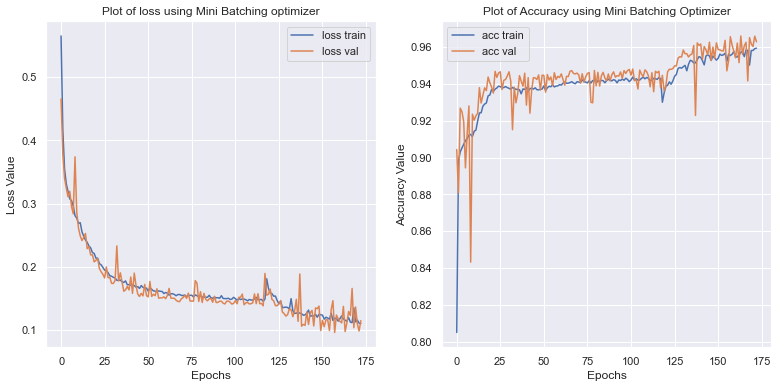

In [93]:
plot_history(history, xlab = "Epochs", ylab1 = "Loss Value", ylab2 = "Accuracy Value",
             title1 = "Plot of loss using Mini Batching optimizer",
             title2 = "Plot of Accuracy using Mini Batching Optimizer")

In [94]:
minib_train_loss = history.history['loss']
minib_val_loss = history.history['val_loss']
minib_train_accuracy = history.history['binary_accuracy']
minib_val_accuracy = history.history['val_binary_accuracy']

In [96]:
model.load_weights('best_model_loss.h5')
# evaluate the model for val_loss
train_accuracy = model.evaluate(x_train1, y_train, verbose=0)
val_accuracy = model.evaluate(x_val1,y_val, verbose=0)
test_accuracy = model.evaluate(X_test1,Y_test, verbose = 0)
minib_train_acc = train_accuracy[1]
minib_test_acc = test_accuracy[1]

print('\033[1m'+"Mini Batching optimizer result")
print("*"*75)
print('\033[1m'+"train_loss: ", train_accuracy[0])
print('\033[1m'+"val_loss: ", val_accuracy[0])
print('\033[1m'+"test_loss", test_accuracy[0])
print()
print("*"*75)
print('\033[1m'+"train_accuracy: ", train_accuracy[1])
print('\033[1m'+"val_accuracy: ", val_accuracy[1])
print('\033[1m'+"test_accuracy", test_accuracy[1])
print()
print("*"*75)

Mini Batching optimizer result
***************************************************************************
train_loss:  0.09801687300205231
val_loss:  0.0959428995847702
test_loss 0.1009964868426323

***************************************************************************
train_accuracy:  0.9625368118286133
val_accuracy:  0.9658190608024597
test_accuracy 0.9618781805038452

***************************************************************************


### RMSprop

**Algorithm RMSProp**

*Input:* global learning rate factor $\alpha$, decay rate $\rho$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$

* **loop**
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate second moment estimate $r_j \leftarrow \rho r_j + (1 - \rho) g_j^2$ for all $j \in \{1, \ldots, d \}$
  * update model $w_j \rightarrow w_j - \frac{\alpha}{\sqrt{r_j}} \cdot g_j$ for all $j \in \{1, \ldots, d \}$

In [118]:
model = model1()
optimizer = RMSprop(learning_rate = 0.01)

model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [119]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15,verbose=1),
             ModelCheckpoint(filepath='best_model_loss.h5', monitor='val_loss', save_best_only=True,verbose=0),
             ReduceLROnPlateau(monitor="val_loss",factor=0.1, patience=25,verbose=1,mode="min",min_lr=0.000000001,cooldown=1)
            ]

In [120]:
epochs = 200
#batch_size = 256

model.summary()
history = model.fit(x_train1, y_train, epochs=epochs,validation_data=(x_val1, y_val),verbose=1,callbacks=callbacks)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 32        
                                                                 
 dense_19 (Dense)            (None, 8)                 40        
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4371/4371 [==============================] - 9s 2ms/step - loss: 0.1819 - binary_accuracy: 0.9372 - val_loss: 0.0992 - val_binary_accuracy: 0.9644 - lr: 0.0100
Epoch 2/200
4371/4371 [==============================] - 8s 2ms/step - loss: 0.0927 - binary_accuracy: 0.9664 - val_loss: 0.0839 - val_binary_accuracy

Epoch 44/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.0527 - binary_accuracy: 0.9853 - val_loss: 0.0518 - val_binary_accuracy: 0.9856 - lr: 0.0100
Epoch 45/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.0514 - binary_accuracy: 0.9858 - val_loss: 0.0397 - val_binary_accuracy: 0.9884 - lr: 0.0100
Epoch 45: early stopping


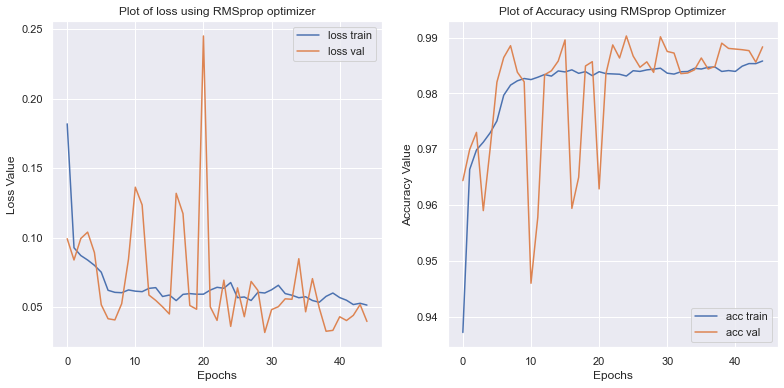

In [121]:
plot_history(history, xlab = "Epochs", ylab1 = "Loss Value", ylab2 = "Accuracy Value",
             title1 = "Plot of loss using RMSprop optimizer",
             title2 = "Plot of Accuracy using RMSprop Optimizer")

In [122]:
rms_train_loss = history.history['loss']
rms_val_loss = history.history['val_loss']
rms_train_accuracy = history.history['binary_accuracy']
rms_val_accuracy = history.history['val_binary_accuracy']

In [123]:
model.load_weights('best_model_loss.h5')
# evaluate the model for val_loss
train_accuracy = model.evaluate(x_train1, y_train, verbose=0)
val_accuracy = model.evaluate(x_val1,y_val, verbose=0)
test_accuracy = model.evaluate(X_test1,Y_test, verbose = 0)
rms_train_acc = train_accuracy[1]
rms_test_acc = test_accuracy[1]
print('\033[1m'+"RMSprop optimizer result")
print("*"*75)
print("train_loss: ", train_accuracy[0])
print("val_loss: ", val_accuracy[0])
print("test_loss", test_accuracy[0])
print()
print("*"*75)
print("train_accuracy: ", train_accuracy[1])
print("val_accuracy: ", val_accuracy[1])
print("test_accuracy", test_accuracy[1])
print()
print("*"*75)

RMSprop optimizer result
***************************************************************************
train_loss:  0.03561524301767349
val_loss:  0.03172531723976135
test_loss 0.037246741354465485

***************************************************************************
train_accuracy:  0.9904250502586365
val_accuracy:  0.9901604652404785
test_accuracy 0.9900233149528503

***************************************************************************


### Vanila SGD

### Stochastic Gradient Descent

Basic idea:Initialize the parameters at some value $w_0 \in R^d$, and decrease the value of the empirical risk iteratively by sampling a random index $\tilde i_t$ uniformly from $\{1, \ldots, n\}$ and then updating

$w_{t+1} = w_t - \alpha_t \cdot \nabla L_{\tilde i_t}(w_t)$

where as usual $w_t$ is the value of the parameter vector at time $t$, $\alpha_t$ is the _learning rate_ or _step size_, and $\nabla f_i$ denotes the gradient of the loss function of the $i$th training example.

In [103]:
model = model1()
optimizer = SGD(learning_rate = 0.01)

model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [104]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15,verbose=1),
             ModelCheckpoint(filepath='best_model_loss.h5', monitor='val_loss', save_best_only=True,verbose=0),
             ReduceLROnPlateau(monitor="val_loss",factor=0.1, patience=25,verbose=1,mode="min",min_lr=0.000000001,cooldown=1)
            ]

In [105]:
epochs = 200
#batch_size = 256

model.summary()
history = model.fit(x_train1, y_train, epochs=epochs,validation_data=(x_val1, y_val),verbose=1,callbacks=callbacks)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 32        
                                                                 
 dense_10 (Dense)            (None, 8)                 40        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4371/4371 [==============================] - 8s 2ms/step - loss: 0.4271 - binary_accuracy: 0.8464 - val_loss: 0.2779 - val_binary_accuracy: 0.9159 - lr: 0.0100
Epoch 2/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.2793 - binary_accuracy: 0.9101 - val_loss: 0.2751 - val_binary_accuracy

Epoch 44/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1782 - binary_accuracy: 0.9368 - val_loss: 0.1834 - val_binary_accuracy: 0.9328 - lr: 0.0100
Epoch 45/200
4371/4371 [==============================] - 8s 2ms/step - loss: 0.1766 - binary_accuracy: 0.9374 - val_loss: 0.1740 - val_binary_accuracy: 0.9381 - lr: 0.0100
Epoch 46/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1747 - binary_accuracy: 0.9381 - val_loss: 0.1550 - val_binary_accuracy: 0.9454 - lr: 0.0100
Epoch 46: early stopping


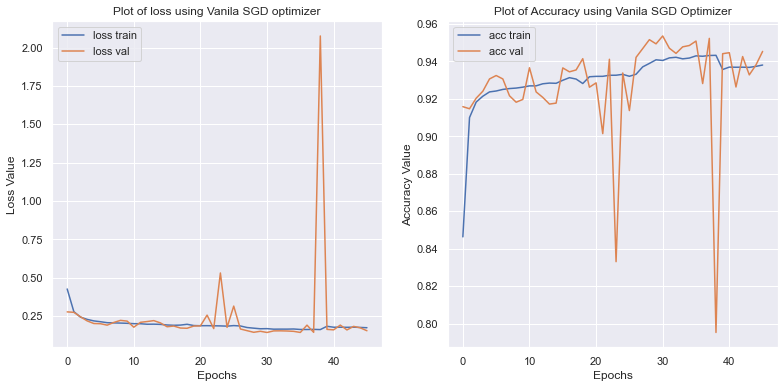

In [106]:
plot_history(history, xlab = "Epochs", ylab1 = "Loss Value", ylab2 = "Accuracy Value",
             title1 = "Plot of loss using Vanila SGD optimizer",
             title2 = "Plot of Accuracy using Vanila SGD Optimizer")

In [107]:
vsgd_train_loss = history.history['loss']
vsgd_val_loss = history.history['val_loss']
vsgd_train_accuracy = history.history['binary_accuracy']
vsgd_val_accuracy = history.history['val_binary_accuracy']

In [108]:
model.load_weights('best_model_loss.h5')
# evaluate the model for val_loss
train_accuracy = model.evaluate(x_train1, y_train, verbose=0)
val_accuracy = model.evaluate(x_val1,y_val, verbose=0)
test_accuracy = model.evaluate(X_test1,Y_test, verbose = 0)
sgd_train_acc = train_accuracy[1]
sgd_test_acc = test_accuracy[1]
print('\033[1m'+"Vanila SGD optimizer result")
print("*"*75)
print("train_loss: ", train_accuracy[0])
print("val_loss: ", val_accuracy[0])
print("test_loss", test_accuracy[0])
print()
print("*"*75)
print("train_accuracy: ", train_accuracy[1])
print("val_accuracy: ", val_accuracy[1])
print("test_accuracy", test_accuracy[1])
print()
print("*"*75)

Vanila SGD optimizer result
***************************************************************************
train_loss:  0.14489518105983734
val_loss:  0.14373686909675598
test_loss 0.14711906015872955

***************************************************************************
train_accuracy:  0.9528188705444336
val_accuracy:  0.9536054730415344
test_accuracy 0.9513523578643799

***************************************************************************


### Adagrad Optimizer

**Algorithm AdaGrad**

*Input:* global learning rate factor $\alpha$, initial parameters $w \in R^d$.

* Initialize $r \leftarrow 0 \in R^d$

* **loop**
  * select a minibatch $\mathcal{B}$ of size $B$
  * compute the stochastic gradient $g \leftarrow \frac{1}{B} \sum_{i \in \mathcal{B}} \nabla f_i(w)$
  * accumulate second moment estimate $r_j \leftarrow r_j + g_j^2$ for all $j \in \{1, \ldots, d \}$
  * update model $w_j \leftarrow w_j - \frac{\alpha}{\sqrt{r_j}} \cdot g_j$ for all $j \in \{1, \ldots, d \}$


In [112]:
model = model1()
optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.01)

model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [113]:
callbacks = [EarlyStopping(monitor='val_loss', patience=15,verbose=1),
             ModelCheckpoint(filepath='best_model_loss.h5', monitor='val_loss', save_best_only=True,verbose=0),
             ReduceLROnPlateau(monitor="val_loss",factor=0.1, patience=25,verbose=1,mode="min",min_lr=0.000000001,cooldown=1)
            ]

In [114]:
epochs = 200
#batch_size = 256

model.summary()
history = model.fit(x_train1, y_train, epochs=epochs,validation_data=(x_val1, y_val),verbose=1,callbacks=callbacks)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 32        
                                                                 
 dense_16 (Dense)            (None, 8)                 40        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4371/4371 [==============================] - 8s 2ms/step - loss: 0.4321 - binary_accuracy: 0.8783 - val_loss: 0.3447 - val_binary_accuracy: 0.9192 - lr: 0.0100
Epoch 2/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.3123 - binary_accuracy: 0.9196 - val_loss: 0.2927 - val_binary_accuracy

Epoch 44/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1013 - binary_accuracy: 0.9657 - val_loss: 0.1041 - val_binary_accuracy: 0.9664 - lr: 0.0100
Epoch 45/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1010 - binary_accuracy: 0.9657 - val_loss: 0.1037 - val_binary_accuracy: 0.9668 - lr: 0.0100
Epoch 46/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1007 - binary_accuracy: 0.9659 - val_loss: 0.1040 - val_binary_accuracy: 0.9668 - lr: 0.0100
Epoch 47/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1005 - binary_accuracy: 0.9661 - val_loss: 0.1038 - val_binary_accuracy: 0.9667 - lr: 0.0100
Epoch 48/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1004 - binary_accuracy: 0.9660 - val_loss: 0.1029 - val_binary_accuracy: 0.9667 - lr: 0.0100
Epoch 49/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.1001 - binary_accuracy: 0.9663 - val_loss: 0.1036 - val

4371/4371 [==============================] - 7s 2ms/step - loss: 0.0930 - binary_accuracy: 0.9696 - val_loss: 0.0962 - val_binary_accuracy: 0.9702 - lr: 0.0100
Epoch 139/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.0930 - binary_accuracy: 0.9694 - val_loss: 0.0964 - val_binary_accuracy: 0.9703 - lr: 0.0100
Epoch 140/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.0930 - binary_accuracy: 0.9695 - val_loss: 0.0960 - val_binary_accuracy: 0.9701 - lr: 0.0100
Epoch 141/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.0929 - binary_accuracy: 0.9695 - val_loss: 0.0968 - val_binary_accuracy: 0.9704 - lr: 0.0100
Epoch 142/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.0928 - binary_accuracy: 0.9695 - val_loss: 0.0957 - val_binary_accuracy: 0.9704 - lr: 0.0100
Epoch 143/200
4371/4371 [==============================] - 7s 2ms/step - loss: 0.0928 - binary_accuracy: 0.9696 - val_loss: 0.0958 - val_binary_

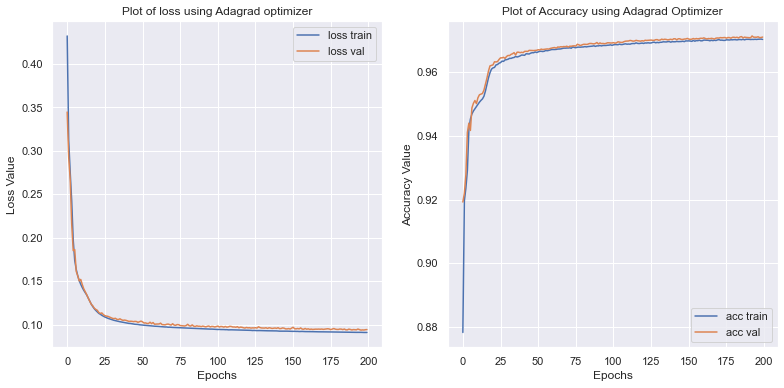

In [115]:
plot_history(history, xlab = "Epochs", ylab1 = "Loss Value", ylab2 = "Accuracy Value",
             title1 = "Plot of loss using Adagrad optimizer",
             title2 = "Plot of Accuracy using Adagrad Optimizer")

In [116]:
ada_train_loss = history.history['loss']
ada_val_loss = history.history['val_loss']
ada_train_accuracy = history.history['binary_accuracy']
ada_val_accuracy = history.history['val_binary_accuracy']

In [117]:
model.load_weights('best_model_loss.h5')
# evaluate the model for val_loss
train_accuracy = model.evaluate(x_train1, y_train, verbose=0)
val_accuracy = model.evaluate(x_val1,y_val, verbose=0)
test_accuracy = model.evaluate(X_test1,Y_test, verbose = 0)
adag_train_acc = train_accuracy[1]
adag_test_acc = test_accuracy[1]
print('\033[1m'+"Adagrad optimizer result")
print("*"*75)
print("train_loss: ", train_accuracy[0])
print("val_loss: ", val_accuracy[0])
print("test_loss", test_accuracy[0])
print()
print("*"*75)
print("train_accuracy: ", train_accuracy[1])
print("val_accuracy: ", val_accuracy[1])
print("test_accuracy", test_accuracy[1])
print()
print("*"*75)

Adagrad optimizer result
***************************************************************************
train_loss:  0.0913066491484642
val_loss:  0.09397800266742706
test_loss 0.09716978669166565

***************************************************************************
train_accuracy:  0.9702668786048889
val_accuracy:  0.9709104299545288
test_accuracy 0.9695208668708801

***************************************************************************


### SECTION: 6

#### Comparison Plot of Loss and Accuracy

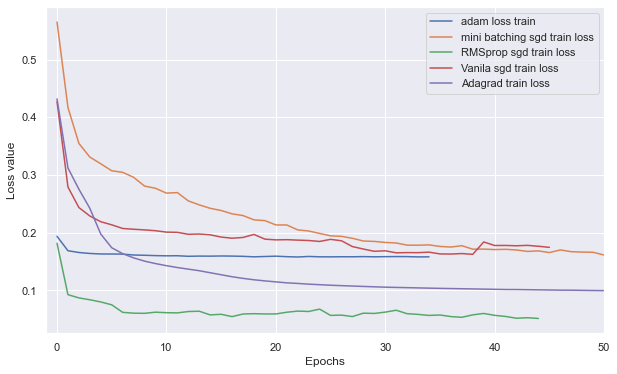

In [126]:
plt.plot(adam_train_loss, label = "adam loss train")
plt.plot(minib_train_loss, label = "mini batching sgd train loss")
plt.plot(rms_train_loss, label = "RMSprop sgd train loss")
plt.plot(vsgd_train_loss, label = "Vanila sgd train loss")
plt.plot(ada_train_loss, label = "Adagrad train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.xlim(-1,50)
plt.plot()
plt.legend()
plt.show()

* From the above plot we can see that RMSprop outperforms among adam, mini-batching,vanila sgd and adagrad optimization technique.
* Also we can see that Adam and Adagrad stabilizes after certain epochs
* On the other side mini-batching and vanila sgd fluctuates over the plots since it takes batch of train data to train the model

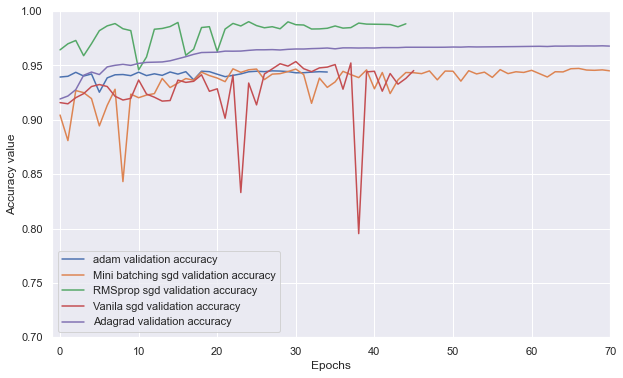

In [130]:
plt.plot(adam_val_accuracy, label = "adam validation accuracy")
plt.plot(minib_val_accuracy, label = "Mini batching sgd validation accuracy")
plt.plot(rms_val_accuracy, label = "RMSprop sgd validation accuracy")
plt.plot(vsgd_val_accuracy, label = "Vanila sgd validation accuracy")
plt.plot(ada_val_accuracy, label = "Adagrad validation accuracy")
plt.xlabel("Epochs")
plt.ylim(0.7,1)
plt.xlim(-1,70)
plt.ylabel("Accuracy value")
plt.legend()
plt.show()

* From the above plot we can see that RMSprop outperforms other optimization technique for this model and gains the highest test accuracy
* Where as adam and adagrad asymptotically converges towards the optima
* On the other side Vanila sgd and mini batching gains less test accuracy than other optimization techniques but these two method have less computation complexity

In [131]:

Classifier = ["Logistic Regression", "Decision Tree", "Random Forest", "Vanila SGD", "Mini Batching", "Adam","RMSprop", "Adagrad"]

Train_accuracy = [sum(clf_reg_lbfgs.predict(x_train2) == y_train)*100/len(X_train),accuracy_score(y_train, y_train_pred)*100,
                  accuracy_score(y_train, y_train_pred)*100, sgd_train_acc*100, minib_train_acc*100, adam_train_acc*100,
                   rms_train_acc*100,adag_train_acc*100]

Test_accuracy = [sum(clf_reg_lbfgs.predict(x_test2) == Y_test)*100/len(X_test),accuracy_score(Y_test, y_predicted)*100,
                 accuracy_score(Y_test, y_pred)*100,sgd_test_acc*100, minib_test_acc*100, adam_test_acc*100,rms_test_acc*100,
                  adag_test_acc*100]

In [132]:
comparison_data = pd.DataFrame([Classifier,Train_accuracy, Test_accuracy]).T

In [133]:
comparison_data.columns = ['Classifier', 'Train_Accuracy', 'Test_Accuracy']; comparison_data

,Classifier,Train_Accuracy,Test_Accuracy
0,Logistic Regression,63.808243,79.875063
1,Decision Tree,100.0,91.277287
2,Random Forest,100.0,97.773557
3,Vanila SGD,95.281887,95.135236
4,Mini Batching,96.253681,96.187818
5,Adam,94.360858,94.288594
6,RMSprop,99.042505,99.002331
7,Adagrad,97.026688,96.952087


### So From the above chart we can conclude that RMSprop optimizing technique on the above defined deep learning model give us the most accurate prediction on the Fraudlent transaction or Normal Transaction 